# Preterm Infant Cardio-Respiratory Signals Database

Source: https://physionet.org/content/picsdb/1.0.0/

## Python prelude

Import basic packages

In [2]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import wfdb # read Physionet/picsdb file format
# from picsdb import *
# from wfdb import processing 
# from tqdm import tqdm

## PART 1: Initial Inspection

### Data import

**Assumption**: data directory is in the current folder and has not been renamed after download from Physionet.  
 (Adapt if necessary)

In [17]:
data_dir="D:\datasets"
print("data directory: ", data_dir)

data directory:  D:\datasets


Make a list of all files in this directory, used later to iterate over all files.

In [18]:
L = os.listdir(data_dir)
for l in L:
    #print(l)
    pass

### Manual file selection

Select one file manually for inspection and loaded with help of the wfdb library:

In [19]:
file_index = 1
file_ecg = os.path.join(data_dir, f"infant{file_index:d}_ecg")
file_resp = os.path.join(data_dir, f"infant{file_index:d}_resp")
print("Loading ECG file : ", file_ecg)
print("Loading RESP file: ", file_resp)
record_ecg = wfdb.rdrecord(file_ecg)
record_resp = wfdb.rdrecord(file_resp)

Loading ECG file :  D:\datasets\infant1_ecg
Loading RESP file:  D:\datasets\infant1_resp


The loaded files contain lots of metadata, the actual ECG/RESP waveforms are stored as arrays.  
The `wfdb` package stored metadata and data in its own format `wfdb.io.record.Record`, but can be retrieved as a Python dictionary (`dict`) :

In [20]:
d_ecg = record_ecg.__dict__
d_resp = record_resp.__dict__
print(d_ecg)
print(d_resp)

{'record_name': 'infant1_ecg', 'n_sig': 1, 'fs': 250, 'counter_freq': None, 'base_counter': None, 'sig_len': 41052191, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['ECG'], 'p_signal': array([[-0.01998352],
       [-0.01998352],
       [-0.01498764],
       ...,
       [-0.31474046],
       [-0.07868511],
       [ 0.33597295]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['infant1_ecg.dat'], 'fmt': ['16'], 'samps_per_frame': [1], 'skew': [None], 'byte_offset': [None], 'adc_gain': [800.6597], 'baseline': [28], 'units': ['mV'], 'adc_res': [0], 'adc_zero': [0], 'init_value': [12], 'checksum': [-25872], 'block_size': [0]}
{'record_name': 'infant1_resp', 'n_sig': 1, 'fs': 500, 'counter_freq': None, 'base_counter': None, 'sig_len': 82122000, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['RESP'], 'p_signal': array([[-0.55500755],
       [-0.55500755],
       [-0.5535156 ],
       ...,
       [24.17565154],
       [24.177143

Some useful parameters are stored under the following keys: 

In [21]:
print("ECG record: ", d_ecg['record_name'])
print("number of signals: ", d_ecg['n_sig'])
print("sampling frequency: ", d_ecg['fs'], "Hz")
print("Number of samples: ", d_ecg['sig_len'])
print("Signal name: ", d_ecg['sig_name'])

ECG record:  infant1_ecg
number of signals:  1
sampling frequency:  250 Hz
Number of samples:  41052191
Signal name:  ['ECG']


In [22]:
print("RESP record: ", d_resp['record_name'])
print("number of signals: ", d_resp['n_sig'])
print("sampling frequency: ", d_resp['fs'], "Hz")
print("Number of samples: ", d_resp['sig_len'])
print("Signal name: ", d_resp['sig_name'])

RESP record:  infant1_resp
number of signals:  1
sampling frequency:  500 Hz
Number of samples:  82122000
Signal name:  ['RESP']


**NOTE**: not all the records use the same sampling frequency, you should therefore read the sampling frequency from the metadata.

Next, extract the ECG/RESP data arrays and convert them into 1-dimensional arrays using `ravel`:

In [23]:
x_ecg = d_ecg['p_signal'].ravel()
print("Number of ECG samples: ", x_ecg.shape[0], " data type: ", x_ecg.dtype)

Number of ECG samples:  41052191  data type:  float64


In [24]:
x_resp = d_resp['p_signal'].ravel()
print("Number of RESP samples: ", x_resp.shape[0], " data type: ", x_resp.dtype)

Number of RESP samples:  82122000  data type:  float64


Store the sampling rates as separate variables:

In [25]:
fs_ecg = d_ecg['fs'] # ECG sampling rate in Hz
dt_ecg = 1/fs_ecg # ECG sampling interval in sec.
fs_resp = d_resp['fs'] # RESP sampling rate in Hz
dt_resp = 1/fs_resp # RESP sampling interval in sec.
print("ECG sampling frequency: ", fs_ecg, " Hz")
print("ECG sampling interval dt = ", dt_ecg, " sec.")
print("RESP sampling frequency: ", fs_resp, " Hz")
print("RESP sampling interval dt = ", dt_resp, " sec.")

ECG sampling frequency:  250  Hz
ECG sampling interval dt =  0.004  sec.
RESP sampling frequency:  500  Hz
RESP sampling interval dt =  0.002  sec.


### Select time window manually

In [26]:
# set display time limits manually, recordings are many hours, millions of data points...
t0_sec, t1_sec = 90620, 90640 # seconds

# ...or, if you want to look at the whole recording:
#t0_sec, t1_sec = 0, x_resp.shape[0]*dt_resp # seconds, based on RESP signal

# convert seconds to samples, respect different sampling rates for ECG and RESP signals
t0_sample_ecg = round(t0_sec * fs_ecg)
t1_sample_ecg = round(t1_sec * fs_ecg)
t0_sample_resp = round(t0_sec * fs_resp)
t1_sample_resp = round(t1_sec * fs_resp)

Plot the result in an external window for inspection:

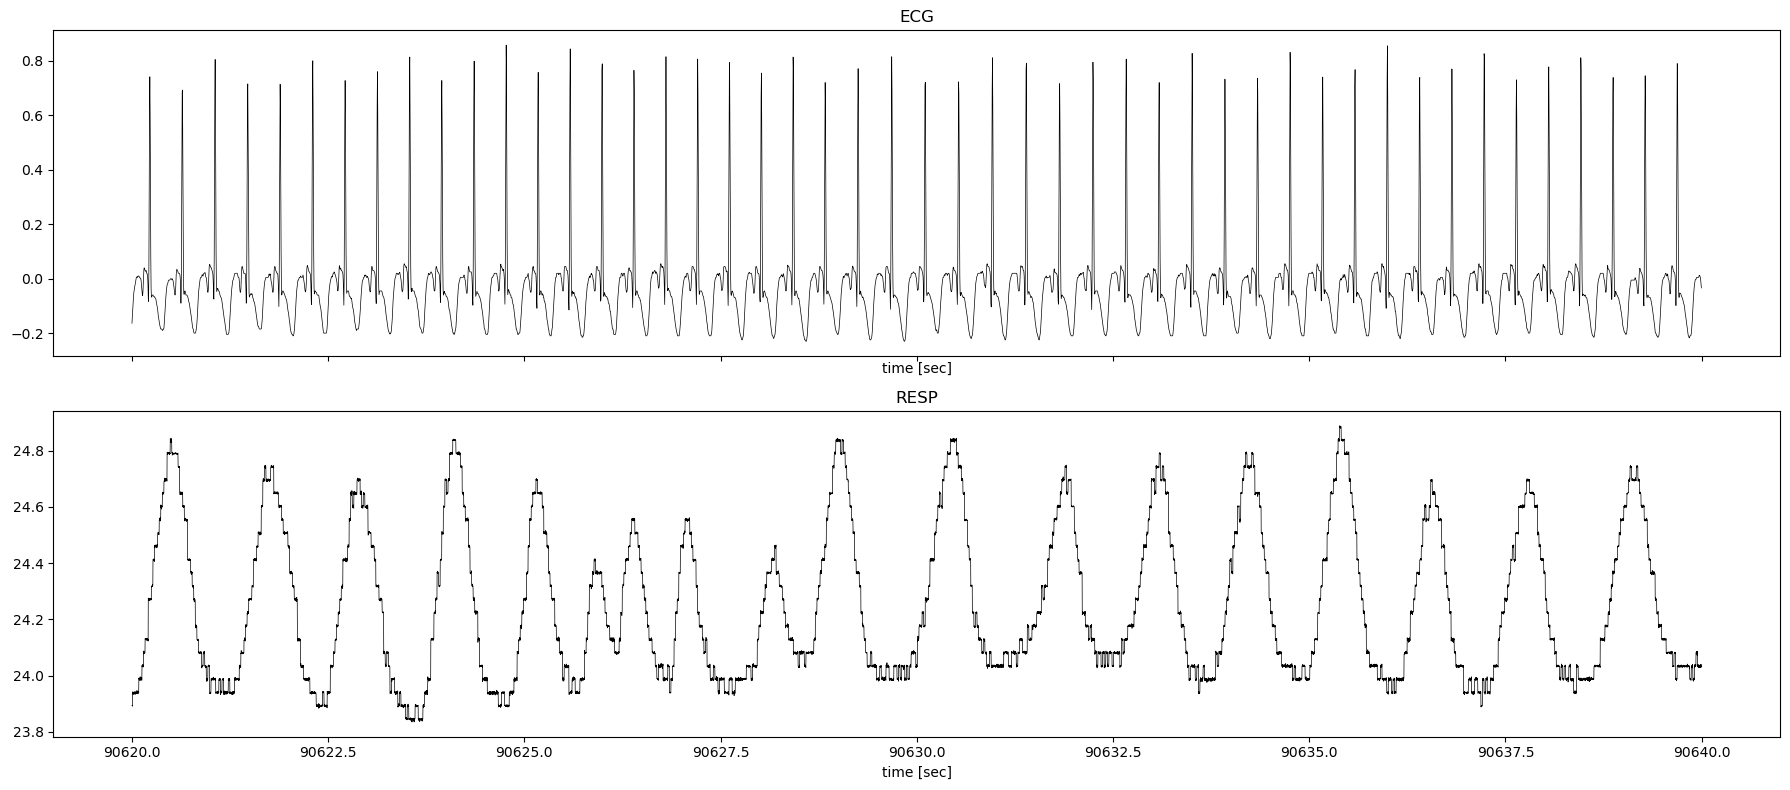

In [27]:
# this tells the notebook to open figures outside of the notebook
#%matplotlib qt
%matplotlib inline

time_ecg = np.arange(x_ecg.shape[0])*dt_ecg # ECG time axis
time_resp = np.arange(x_resp.shape[0])*dt_resp # RESP time axis

fig1, ax = plt.subplots(2, 1, figsize=(18,8), sharex=True)
ax[0].plot(time_ecg[t0_sample_ecg:t1_sample_ecg], x_ecg[t0_sample_ecg:t1_sample_ecg], '-k', lw=0.5)
ax[1].plot(time_resp[t0_sample_resp:t1_sample_resp], x_resp[t0_sample_resp:t1_sample_resp], '-k', lw=0.5)
ax[0].set_xlabel("time [sec]")
ax[1].set_xlabel("time [sec]")
ax[0].set_title("ECG")
ax[1].set_title("RESP")
plt.tight_layout()
plt.show()

## PART 2: Selection of Sample Segments

Use the manually selected segment borders (in seconds) that were identified visually using `picsdb1_inspect.ipynb`:

In [28]:
#A
segments = {}
for i in range(10):
    key = f"infant{i+1:d}"
    segments[key] = []
segments['infant1'] = [(3550, 3750), (4720,4822), (5100,5280), (7760,7870), (11435,11550)]
segments['infant2'] = [(3990,4090), (9440,9580), (9770,9890), (11940,12080), (12180,12350)]
segments['infant3'] = [(5575,5760), (10200,10340), (10400,10600), (13300,13500), (13700,13940)]
segments['infant4'] = [(5860,6020), (6695,6810), (6900,7020), (8350,8450), (12750,12980)]
segments['infant5'] = [(103750,104000), (121275, 121375), (122475,122575), (146500,146600), (147050,147350)]
segments['infant6'] = [(7130,7230), (7350,7530), (11440,11600), (13290,13390), (13530,13670)]
segments['infant7'] = [(5060,5190), (5480,5590), (9150,9450), (9500,9675), (13420,13630)]
segments['infant8'] = [(4880,5000), (5040,5140), (6690,6790), (7500,7700), (14440,14570)]
segments['infant9'] = [(5940,6040), (7620,7740), (11120,11220), (11540,11640), (12400,12580)]
segments['infant10'] = [(3225,3400), (9500,9700), (10150,10350), (14500,14600), (14610,14710)]

## PART 3: Selecting thresholds for peak detection for each sample

Part 3 will be re-ran every segement. The final thresholds selected will be recorded in columns D to K of 'Preterm Infant Data Input Settings Blank' excel spreadsheet.

Our complete and filled out excel spreadsheet is titled 'Preterm Infant Data Input Settings'. Refer to that if wanting to produce our exact results.

**Step One: Select segement to work with**

Select a segment to work with by entering in an Infant number/ file_index (1 to 10) and a segement number/ segment_index (0 to 4)

In [29]:
file_index = 2 # 1...10, loads data from infant1 ... infant10
segment_index = 1 # 0,...

**Step Two: Import all the revelent data for that segement**

Similar to part 1, the data will be imported but only part of the signal. Part 2, Step Two created a dictionary that will be used so the correct segment of time is selected from the overall signal and Part 3, Step One determines which segment it is.

## Data import

In [30]:
x_ecg_full, x_resp_full, fs_ecg, fs_resp = load_waveforms(data_dir, file_index)
dt_ecg = 1/fs_ecg # ECG sampling interval in sec.
dt_resp = 1/fs_resp # RESP sampling interval in sec.
print("ECG sampling interval dt = ", dt_ecg, " sec.")
print("RESP sampling interval dt = ", dt_resp, " sec.")

Loading ECG file:  infant2_ecg
Loading RESP file:  infant2_resp
ECG sampling frequency:  500  Hz
RESP sampling frequency:  50  Hz
ECG sampling interval dt =  0.002  sec.
RESP sampling interval dt =  0.02  sec.


Clip data to segment borders:

In [31]:
# get segment borders in seconds from the 'segments' dictionary
t0_sec, t1_sec = segments[f"infant{file_index:d}"][segment_index]
# convert seconds to samples, respect different sampling rates for ECG and RESP signals
t0_sample_ecg = round(t0_sec * fs_ecg)
t1_sample_ecg = round(t1_sec * fs_ecg)
t0_sample_resp = round(t0_sec * fs_resp)
t1_sample_resp = round(t1_sec * fs_resp)

Extract the ECG and RESP data arrays and convert them to a 1-dimensional arrays:

In [32]:
x_ecg = x_ecg_full[t0_sample_ecg:t1_sample_ecg]
x_resp = x_resp_full[t0_sample_resp:t1_sample_resp]
print("number of ECG samples: ", x_ecg.shape[0], " data type: ", x_ecg.dtype)
print("number of RESP samples: ", x_resp.shape[0], " data type: ", x_resp.dtype)
del x_ecg_full, x_resp_full # free memory

number of ECG samples:  70000  data type:  float64
number of RESP samples:  7000  data type:  float64


Invert ECG signal if necessary.

mn = np.min(x_ecg-np.median(x_ecg))
mx = np.max(x_ecg-np.median(x_ecg))
if np.abs(mn) > np.abs(mx):
    print("Invert ECG signal!")
    x_ecg = -x_ecg

**Step Three: Plot the signal to check the segment selected**

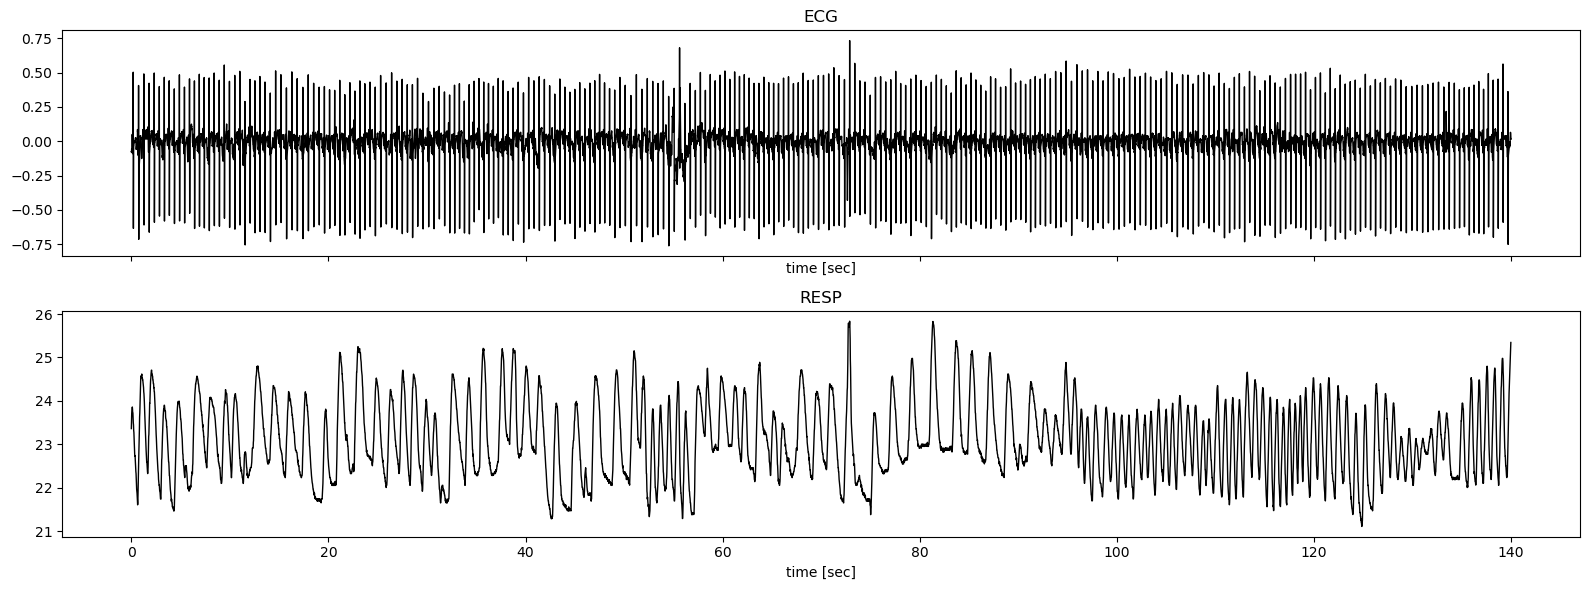

In [33]:
# open figures outside of the notebook
#%matplotlib qt
%matplotlib inline

# ECG/RESP time axes [sec]
time_ecg = np.arange(x_ecg.shape[0])*dt_ecg
time_resp = np.arange(x_resp.shape[0])*dt_resp

fig1, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)
ax[0].plot(time_ecg, x_ecg, '-k', lw=1)
ax[1].plot(time_resp, x_resp, '-k', lw=1)
ax[0].set_xlabel("time [sec]")
ax[1].set_xlabel("time [sec]")
ax[0].set_title("ECG")
ax[1].set_title("RESP")
plt.tight_layout()
plt.show()

**Step Four: Define a few functions to process the signal with**

- A) Bandwidth filter (filters out extreme frequency signals that are out of what's is physically possible)
- B) Local Maxima- to detect the peak of a wave
- C) Histogram- to look at distribution 
- D) Interval Statistics 

**NOTE**: These functions have been moved from the notebook into the external file `picsdb.py`

# ECG/RESP peak detection algorithm

## Plot power spectra

First, inspect the power spectral densities of ECG/RESP signals to get an idea of useful settings for the band-pass filters.

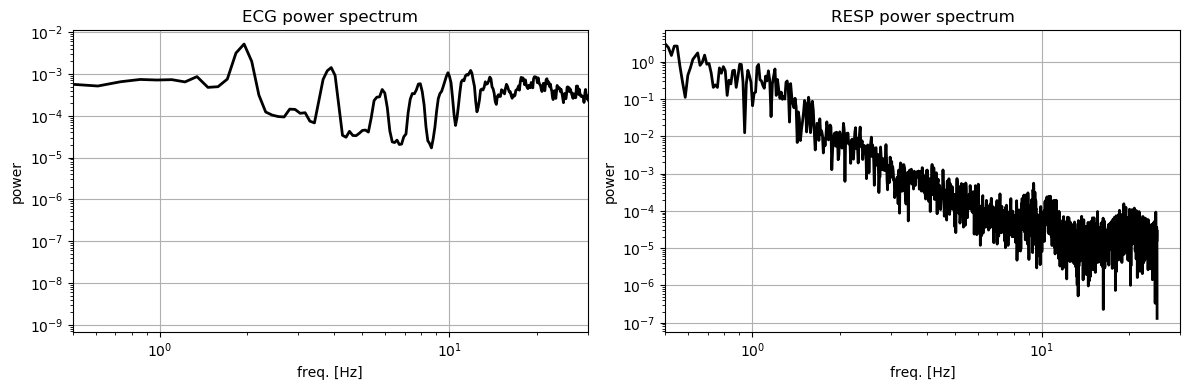

In [34]:
n_seg = 4096
freqs_ecg, psd_ecg = welch(x_ecg, fs=fs_ecg, nperseg=n_seg)
freqs_resp, psd_resp = welch(x_resp, fs=fs_resp, nperseg=n_seg)

# min and max frequencies displayed
freq_min_disp = 0.5
freq_max_disp = 30

fig, ax = plt.subplots(1, 2, figsize=(12,4))
#ax[0].semilogy(freqs_ecg, psd_ecg, '-k', lw=2)
ax[0].loglog(freqs_ecg, psd_ecg, '-k', lw=2)
ax[0].grid()
ax[0].set_xlim(freq_min_disp, freq_max_disp)
ax[0].set_xlabel("freq. [Hz]")
ax[0].set_ylabel("power")
ax[0].set_title("ECG power spectrum")
#ax[1].semilogy(freqs_resp, psd_resp, '-k', lw=2)
ax[1].loglog(freqs_resp, psd_resp, '-k', lw=2)
ax[1].grid()
ax[1].set_xlim(freq_min_disp, freq_max_disp)
ax[1].set_xlabel("freq. [Hz]")
ax[1].set_ylabel("power")
ax[1].set_title("RESP power spectrum")
plt.tight_layout()
plt.show()

**Step Five: Define cut-off frequencies for ECG and RESP signals**

These cut-off frequencies are chosen based off a combination of what is physiologically possible and the sampling frequency of the signal. They should be kept the same across all infants HOWEVER infant 1 and 5's ECG sampling rate was 250Hz instead of 500Hz. Therefore, we had to lower the freq_hi_ecg setting to 120Hz, as the value must be less than half the sampling rate. The rest of the infants freq_hi_ecg was 125Hz.

The following cell allows you to check if your settings work for the sample. Record the settings in column D, E, F and G in 'Preterm Infant Data Input Settings Blank'.

In [35]:
freq_lo_ecg = 20
freq_hi_ecg = 120
freq_lo_resp = 0.5
freq_hi_resp = 5 # 5

**Step Six: Apply the band-pass filter**

Using the function defined in step 4, A and the settings defined in step 5, a band-pass filter is created and applied to further filter out any signals that could be aretfacts/ background.

In [36]:
x_ecg_filt  = bp_filter(x_ecg, fs_ecg, freq_lo_ecg, freq_hi_ecg)
x_resp_filt = bp_filter(x_resp, fs_resp, freq_lo_resp, freq_hi_resp)

**Step Seven: 1st Try to detect cycle peaks/ local maxima**

- A) Local maxima parmeters are defined using the function defined in step 4, B
- B) The results are plotted for a visual inspection

In the first run, all local maxima in ECG/RESP waveforms are detected.

**Definition** (local maximum): zero-crossing from pos. to neg. values of the first derivative $\Delta_t (x) = x_{t+1}-x_t$, as code: (`x[t+1]-x[t]`).

**Note-1**: *all* local maxima are found. Due to measurement noise and other artefacts most of them are not the peaks we are trying to detect.

**Note-2**: the local maxima are detected in the band-pass filtered signals

In [37]:
locmax_ecg = locmax(x_ecg_filt)
locmax_resp = locmax(x_resp_filt)

Mark the detected local maxima with red dots:

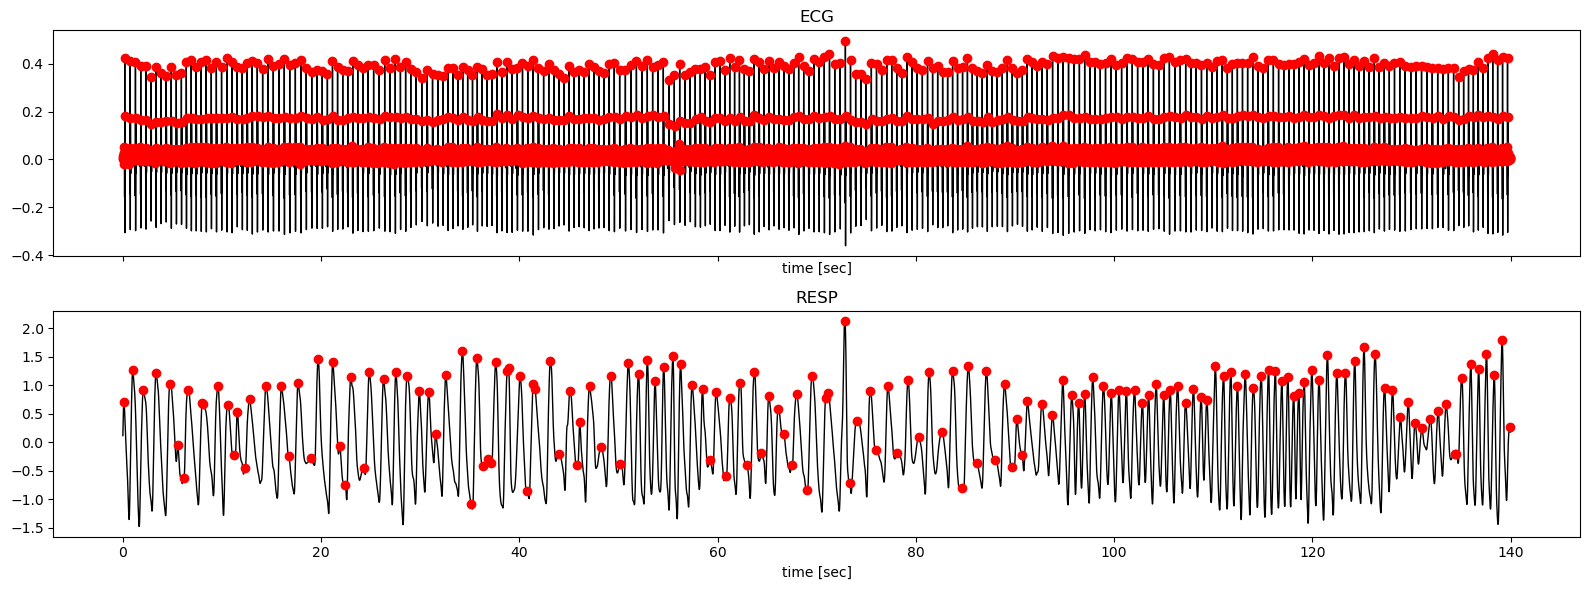

In [38]:
fig2, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)

ax[0].plot(time_ecg, x_ecg_filt, '-k', lw=1)
ax[0].plot(time_ecg[locmax_ecg], x_ecg_filt[locmax_ecg], 'or', ms=6) # local maxima
ax[0].set_xlabel("time [sec]")
ax[0].set_title("ECG")

ax[1].plot(time_resp, x_resp_filt, '-k', lw=1)
ax[1].plot(time_resp[locmax_resp], x_resp_filt[locmax_resp], 'or', ms=6) # local maxima
ax[1].set_xlabel("time [sec]")
ax[1].set_title("RESP")

plt.tight_layout()
plt.show()

**Step Eight: Refining local maxima detection by selecting an appropriate threshold**
- A) To aid in easy selection of an appropriate threshold, a peak height distrubition histogram is created, with help of the function defined in step 4, c.
- B) An alternative way is using a determined percentile and the value of that threshold as the threshold. However we found it easier to using the histograms and manually adjust
- C)This cell determines the threshold used in the peak detection. Once running the code for the first time, it will be this cell you manually adjust to refine for threshold selection. Once you are happy with the value's outcome, record these values in columns H and I in'Preterm Infant Data Input Settings Blank'.
- D) Allows you to visualise where your selected threshold falls on the histogram distribution 
- E) Finally apply your threshold to the peak detection of your data
- F) Allows you to visually check the thresholds effect on the peak detection. If peaks are missing, we recommend lowering the threshold. If too many peaks are detected we recommend raising the threshold (in cell C) 

**Peak height distributions**

To select significant peaks, plot the distribution (histogram) of peak heights, using a window of `2w` samples around the local maxima `x_m`, i.e. `sum[x_m-w:x_m+w]`.
 - the heights are computed in the band-pass filtered signals
 - the function `p_hat` has two options to estimate distributions, `histogram` and `kernel`

In [39]:
w = 1
ecg_peaks = np.array([np.mean(x_ecg_filt[i-w:i+w]) for i in locmax_ecg])
resp_peaks = np.array([np.mean(x_resp_filt[i-w:i+w]) for i in locmax_resp])
x0, p_ecg_peaks = p_hat(ecg_peaks, n_bins=50, method='histogram')
x1, p_resp_peaks = p_hat(resp_peaks, n_bins=50, method='histogram')

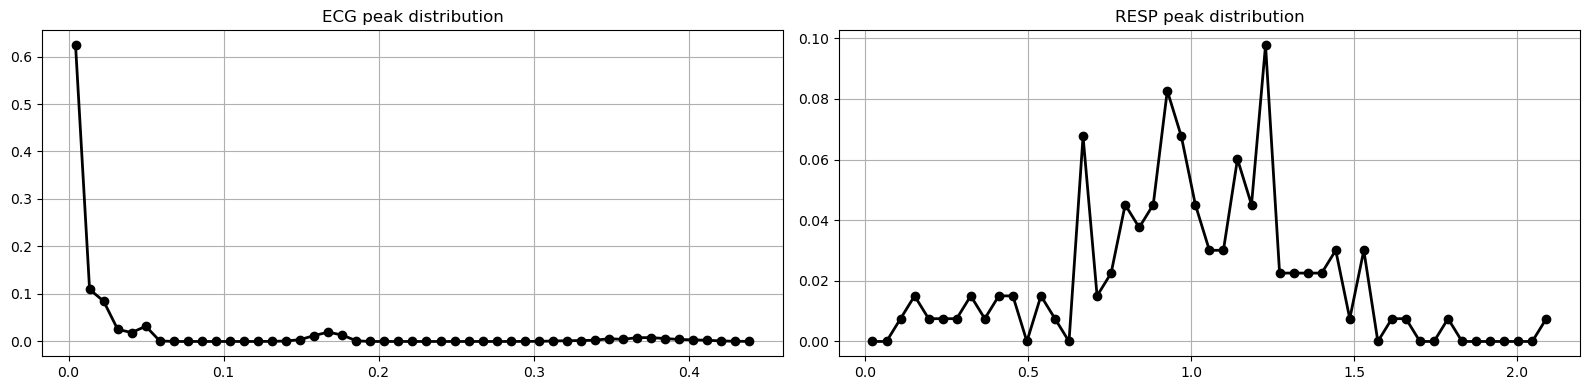

In [40]:
fig3, ax = plt.subplots(1,2,figsize=(16,4))
ax[0].plot(x0, p_ecg_peaks, '-ok', lw=2)
ax[1].plot(x1, p_resp_peaks, '-ok', lw=2)
ax[0].set_title("ECG peak distribution")
ax[1].set_title("RESP peak distribution")
ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
plt.show()

Observations:
- ECG: the R-peak of the QRS complexes should produce a small but clearly separated mode which distinguishes R-peaks from other (small) peaks
- RESP: the distribution is more symmmetrical and noisy than the ECG local maxima distribution

## Peak detection: second run

The actual local maxima are defined by a manual threshold setting, based on the distributions above and visual control of the detected peaks.

**Options: percentile / manual**

Set the threshold using either of:
1. distribution percentiles (50 = median of distribution)
2. manually

In [41]:
option = 'manual' # 'percentile', 'manual'
if option == 'percentile':
    threshold_pct_ecg = 95.5
    threshold_pct_resp = 30
    thr_ecg = np.percentile(ecg_peaks, threshold_pct_ecg)
    thr_resp = np.percentile(resp_peaks, threshold_pct_resp)
if option == 'manual':
    thr_ecg = 0.12
    thr_resp = 0.20
print(f"ECG threshold: {thr_ecg:.3f}")
print(f"RESP threshold: {thr_resp:.3f}")

ECG threshold: 0.120
RESP threshold: 0.200


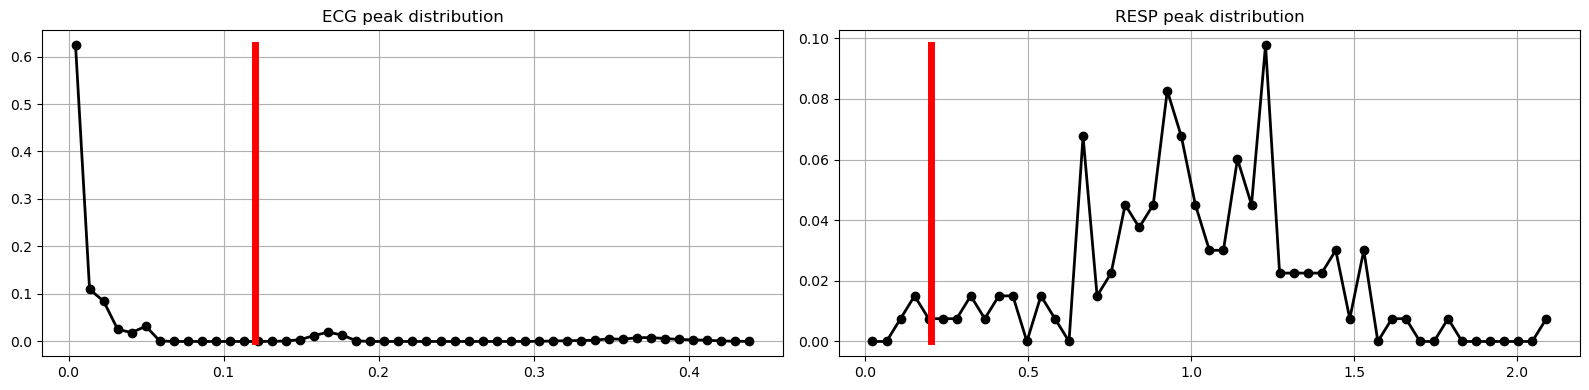

In [42]:
fig3a, ax = plt.subplots(1,2,figsize=(16,4))
ax[0].plot(x0, p_ecg_peaks, '-ok', lw=2)
ax[0].plot([thr_ecg, thr_ecg], [0, p_ecg_peaks.max()], '-r', lw=5)
#ax[0].annotate(f"{threshold_pct_ecg:.1f} %", xy=(thr_ecg, p_ecg_peaks.max()), xycoords='data', color="r", fontsize=24)
ax[1].plot(x1, p_resp_peaks, '-ok', lw=2)
ax[1].plot([thr_resp, thr_resp], [0, p_resp_peaks.max()], '-r', lw=5)
#ax[1].annotate(f"{threshold_pct_resp:.1f} %", xy=(thr_resp, p_resp_peaks.max()), xycoords='data', color="r", fontsize=24)
ax[0].set_title("ECG peak distribution")
ax[1].set_title("RESP peak distribution")
ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
plt.show()

**Check**: The selected threshold (vertical red line) should be to the left of the distribution caused by the peaks of interest.

**Apply threshold**

In [43]:
locmax_ecg = np.array([j for i, j in enumerate(locmax_ecg) if ecg_peaks[i] > thr_ecg])
locmax_resp = np.array([j for i, j in enumerate(locmax_resp) if resp_peaks[i] > thr_resp])

**Step Nine: Removing peaks that are too close together**

If you find peaks are being detected too close together and raising the threshold will result in true peaks being missed, setting a reasonable maxiumum allowed ECG and RESP frequency can assist in eliminating these double peaks. We apply this to all out samples and adjust if need be. Record in columns J and K of Preterm Infant Settings Input Blank.

- A) Set the frequency
- B) Apply to ECG
- C) Apply to RESP

Set reasonable maximum allowed ECG and RESP frequencies.

In [44]:
f_max_ecg = 10 # Hz
f_max_resp = 2.5 # Hz

In [45]:
# apply to ECG
pp_min_ecg = 1/f_max_ecg # sec.
n_min_ecg = np.round(pp_min_ecg/dt_ecg)
locmax_ecg_copy = locmax_ecg.copy()
for i in range(len(locmax_ecg)-1):
    if (locmax_ecg[i+1]-locmax_ecg[i] < n_min_ecg):
        locmax_ecg_copy[i+1] = 0
locmax_ecg = locmax_ecg_copy
locmax_ecg = locmax_ecg[locmax_ecg>0]

In [46]:
# apply to RESP
pp_min_resp = 1/f_max_resp # sec.
n_min_resp = np.round(pp_min_resp/dt_resp)
locmax_resp_copy = locmax_resp.copy()
for i in range(len(locmax_resp)-1):
    if (locmax_resp[i+1]-locmax_resp[i] < n_min_resp):
        locmax_resp_copy[i+1] = 0
locmax_resp = locmax_resp_copy
locmax_resp = locmax_resp[locmax_resp>0]

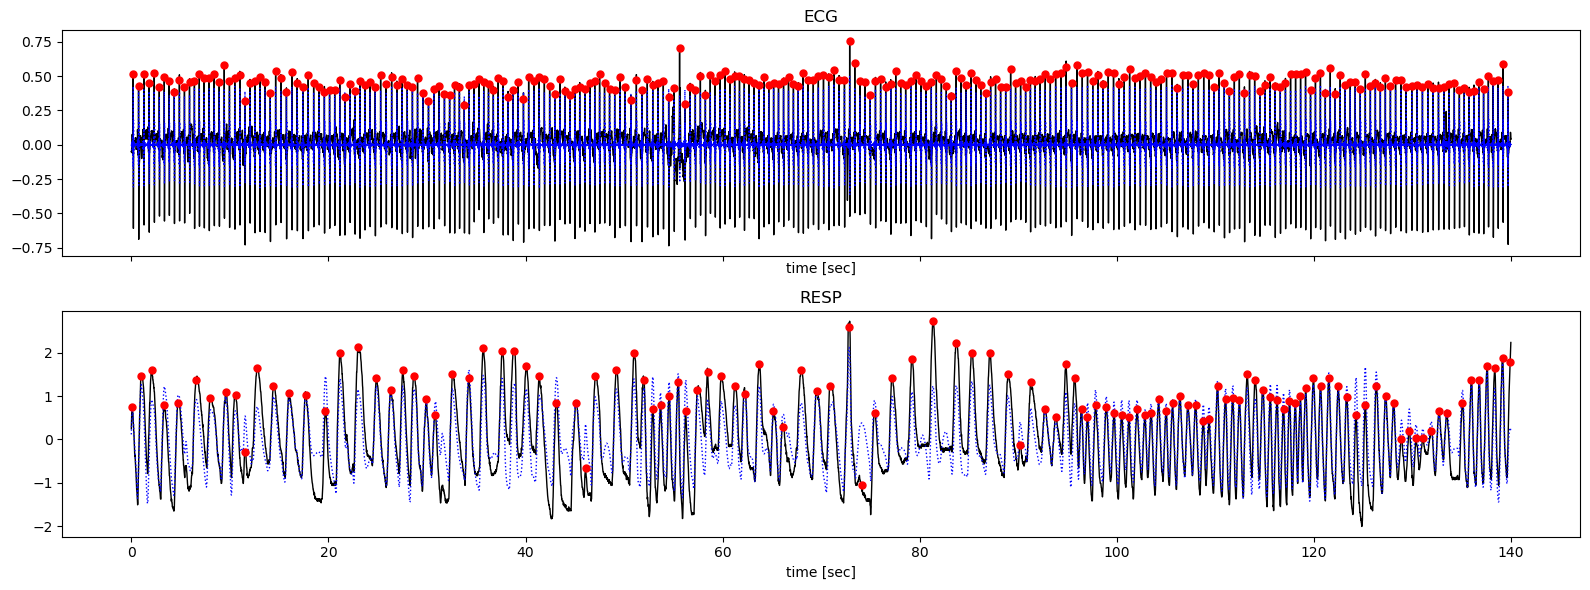

In [47]:
#%matplotlib qt
%matplotlib inline

fig4, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)

x_ecg_demean = x_ecg-x_ecg.mean()
ax[0].plot(time_ecg, x_ecg_demean, '-k', lw=1) # original ECG signal (black line)
ax[0].plot(time_ecg, x_ecg_filt, ':b', lw=1) # band-pass filtered ECG (blue-dotted line)
ax[0].plot(time_ecg[locmax_ecg], x_ecg_demean[locmax_ecg], 'or', ms=5) # local maxima as red dots on unfiltered ECG
#ax[0].plot(time_ecg[locmax_ecg], x_ecg_filt[locmax_ecg], 'or', ms=5) # local maxima as red dots on filtered ECG
ax[0].set_xlabel("time [sec]")
ax[0].set_title("ECG")

x_resp_demean = x_resp-x_resp.mean()
ax[1].plot(time_resp, x_resp-x_resp.mean(), '-k', lw=1) # original RESP signal (black line)
ax[1].plot(time_resp, x_resp_filt, ':b', lw=1) # band-pass filtered RESP (blue-dotted line) 
ax[1].plot(time_resp[locmax_resp], x_resp_demean[locmax_resp], 'or', ms=5) # local maxima as red dots on unfiltered RESP
#ax[1].plot(time_resp[locmax_resp], x_resp_filt[locmax_resp], 'or', ms=5) # local maxima as red dots on filtered RESP
#for i,p in enumerate(locmax_resp):
#    ax[1].plot([time_resp[p],time_resp[p]], [x_resp_demean[p]+0.1,x_resp_demean[p]+0.2], '-r', lw=1)
ax[1].set_xlabel("time [sec]")
ax[1].set_title("RESP")

plt.tight_layout()
plt.show()

# Interval statistics

Compute some peak-to-peak statistics as a 'sanity check':

In [48]:
print("\nECG stats:")
ecg_intervals = interval_stats(locmax_ecg, dt_ecg)
#print(ecg_intervals)
#plt.plot(ecg_intervals, '-ok'); plt.show()


ECG stats:
Interval stats (n=269) :
min: 0.48 sec
max: 0.58 sec
mean: 0.52 sec (= 1.93 Hz)
std: 0.02 sec
q25: 0.50 sec
q75: 0.53 sec


In [49]:
print("\nRESP stats:")
resp_intervals = interval_stats(locmax_resp, dt_resp)
#print(resp_intervals)
plt.show()


RESP stats:
Interval stats (n=124) :
min: 0.52 sec
max: 2.36 sec
mean: 1.13 sec (= 0.89 Hz)
std: 0.43 sec
q25: 0.78 sec
q75: 1.44 sec
